In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from scipy.stats import linregress
from scipy.optimize import curve_fit

</br></br></br>

--------------------

</br>

# Outline

Comparing Indices and GOOG.

</br></br></br>

--------------------

</br>

# GOOG

In [2]:
goog_df = pd.read_csv("GOOG.csv")

display(goog_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
5,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132
6,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967
7,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037
8,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734
9,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504


In [3]:
# Conver Date to DateTime Object:
goog_df["DATETIME"] = pd.to_datetime(goog_df["Date"], format="%Y-%m-%d")
goog_df["Day"] = (goog_df["DATETIME"] - goog_df["DATETIME"].iloc[-1]).dt.days

display(goog_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004-08-20,-6961
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004-08-23,-6958
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004-08-24,-6957
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004-08-25,-6956
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,2004-08-26,-6955
5,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132,2004-08-27,-6954
6,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967,2004-08-30,-6951
7,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037,2004-08-31,-6950
8,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734,2004-09-01,-6949
9,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504,2004-09-02,-6948


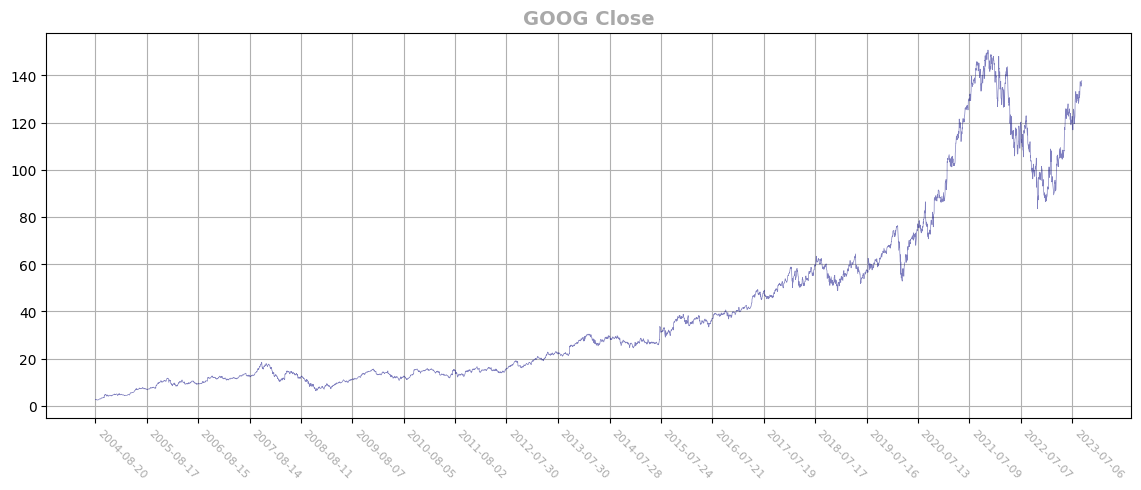

In [4]:
fig = plt.figure(figsize=(14., 5.0))
ax = fig.gca()

day = goog_df["Day"].to_numpy()
close = goog_df["Close"].to_numpy()
dates = goog_df["Date"].to_numpy()

ax.set_title("GOOG Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [5]:
day = goog_df["Day"].to_numpy()
close = goog_df["Close"].to_numpy()
log_close = np.log(close)
dates = goog_df["Date"].to_numpy()

strt_date = "2010-01-01"
end_date =  "2020-01-01"
target_date = goog_df['Date'].iloc[-1]

strt_day_idx = goog_df.index[goog_df["DATETIME"] >= strt_date][0]
end_day_idx = goog_df.index[goog_df["DATETIME"] > end_date][0]
target_day_idx = goog_df.index[goog_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {goog_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {goog_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {goog_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2010-01-04
	End Date:    2020-01-02
	Target Date: 2023-09-11


In [6]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0004966
	Intercept:    4.9125163
	Est. Annual:  0.1986687
Ratio of Expected to Current:  0.985761
Max Deviation:                 1.5488093

Projected Price:               135.779


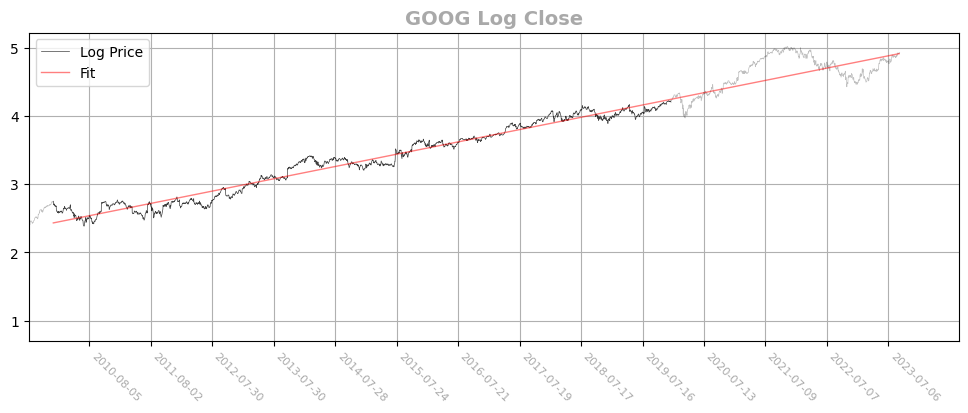

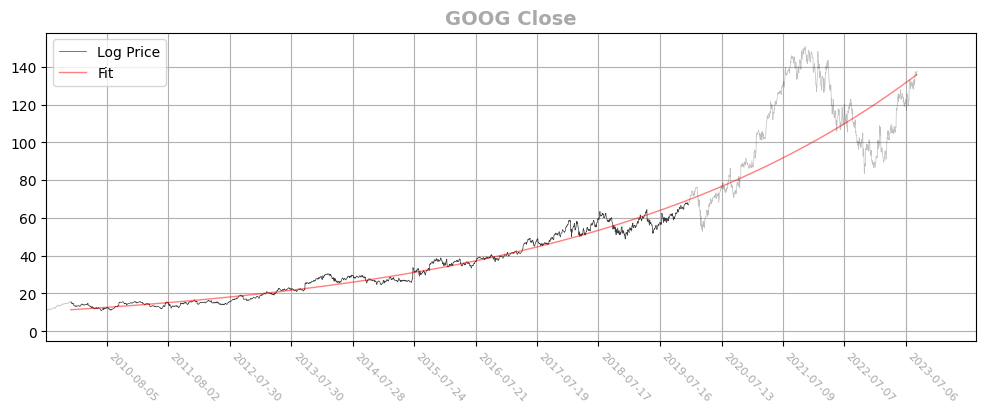

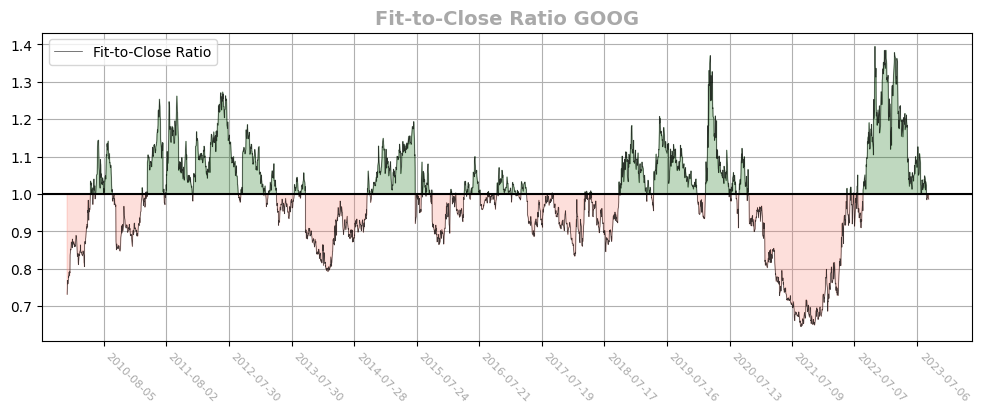

In [7]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("GOOG Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("GOOG Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio GOOG", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of the Log Returns:

Log Return Mean & STD :
 - Daily Mean:   0.000587 ± 0.0003053
 - Daily STD:    0.015314

Est. Annual Growth:  0.1083  to  0.3848


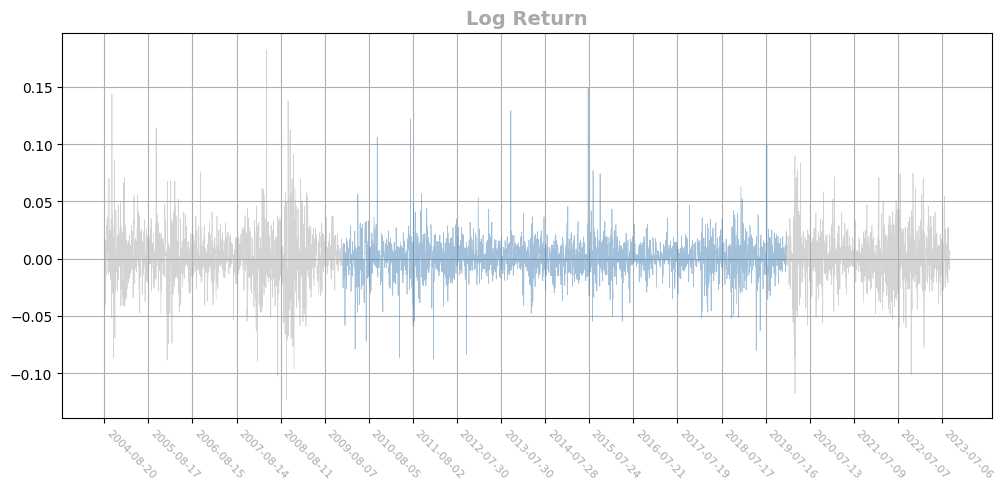

In [8]:
close = goog_df["Close"].to_numpy()
day = goog_df["Day"].to_numpy()[:-1]
dates = goog_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Daily Mean:  ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - Daily STD:   ", np.around(log_returns_in_range.std(), 7))
annual_low = np.power(1.0 + log_returns_in_range.mean() - est_err, 365) - 1.0
annual_high = np.power(1.0 + log_returns_in_range.mean() + est_err, 365) - 1.0
print("\nEst. Annual Growth: ", np.around(annual_low, 4), " to ", np.around(annual_high, 4))

fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

## Cummulative Gain During Period:

In [9]:
day = goog_df["Day"].to_numpy()
low = goog_df["Low"].to_numpy()
high = goog_df["High"].to_numpy()
close = goog_df["Close"].to_numpy()
dates = goog_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = goog_df['Date'].iloc[-1]

cumm_strt_day_idx = goog_df.index[goog_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = goog_df.index[goog_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = goog_df.index[goog_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {goog_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {goog_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {goog_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2023-09-11


In [10]:
# Compute number of shares if purchased daily with a fix amount:
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.774
	Max Gain at Target:   1.836
	Close Gain at Target: 1.808
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# NASDAQ-100

In [11]:
ndx_df = pd.read_csv("NDX.csv")

display(ndx_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1,1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
2,1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
3,1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
4,1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
5,1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000
6,1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000
7,1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000
8,1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000
9,1985-10-14,111.050003,113.269997,111.050003,113.184998,113.184998,123120000


In [12]:
# Conver Date to DateTime Object:
ndx_df["DATETIME"] = pd.to_datetime(ndx_df["Date"], format="%Y-%m-%d")
ndx_df["Day"] = (ndx_df["DATETIME"] - ndx_df["DATETIME"].iloc[-1]).dt.days

display(ndx_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000,1985-10-01,-13859
1,1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,1985-10-02,-13858
2,1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,1985-10-03,-13857
3,1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,1985-10-04,-13856
4,1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,1985-10-07,-13853
5,1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000,1985-10-08,-13852
6,1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000,1985-10-09,-13851
7,1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000,1985-10-10,-13850
8,1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000,1985-10-11,-13849
9,1985-10-14,111.050003,113.269997,111.050003,113.184998,113.184998,123120000,1985-10-14,-13846


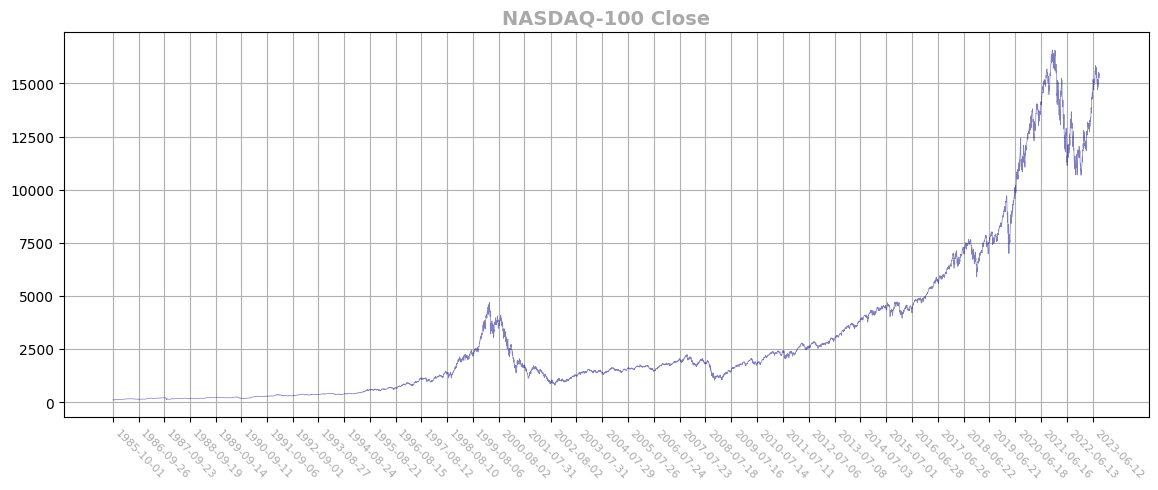

In [13]:
fig = plt.figure(figsize=(14., 5.0))
ax = fig.gca()

day = ndx_df["Day"].to_numpy()
close = ndx_df["Close"].to_numpy()
dates = ndx_df["Date"].to_numpy()

ax.set_title("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [14]:
day = ndx_df["Day"].to_numpy()
close = ndx_df["Close"].to_numpy()
log_close = np.log(close)
dates = ndx_df["Date"].to_numpy()

strt_date = "2010-01-01"
end_date = "2020-01-01"
target_date = ndx_df['Date'].iloc[-1]

strt_day_idx = ndx_df.index[ndx_df["DATETIME"] >= strt_date][0]
end_day_idx = ndx_df.index[ndx_df["DATETIME"] > end_date][0]
target_day_idx = ndx_df.index[ndx_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {ndx_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {ndx_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {ndx_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2010-01-04
	End Date:    2020-01-02
	Target Date: 2023-09-11


In [15]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0004202
	Intercept:    9.6070714
	Est. Annual:  0.1657339
Ratio of Expected to Current:  0.9604805
Max Deviation:                 1.471452

Projected Price:               14850.825


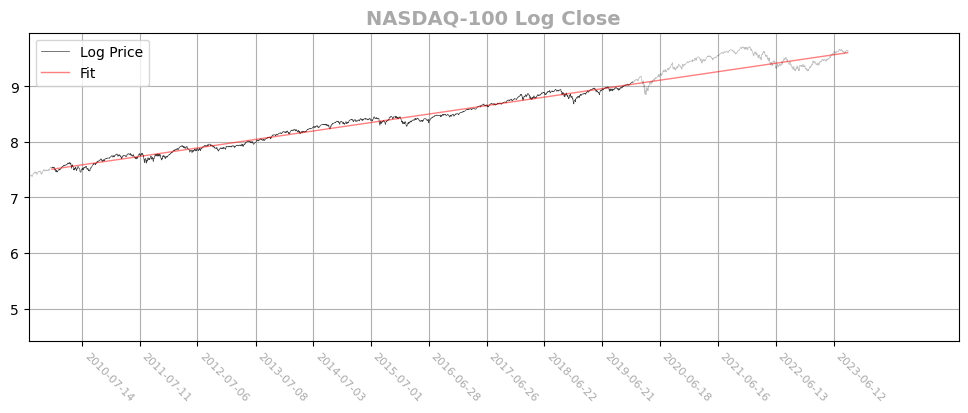

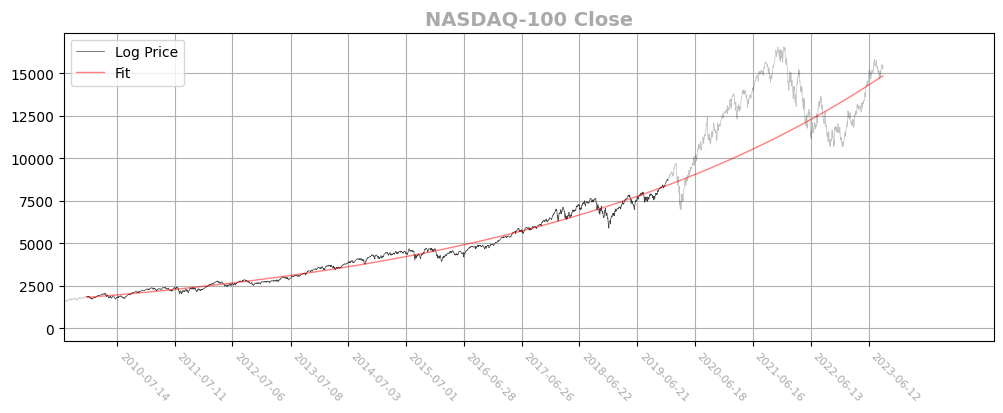

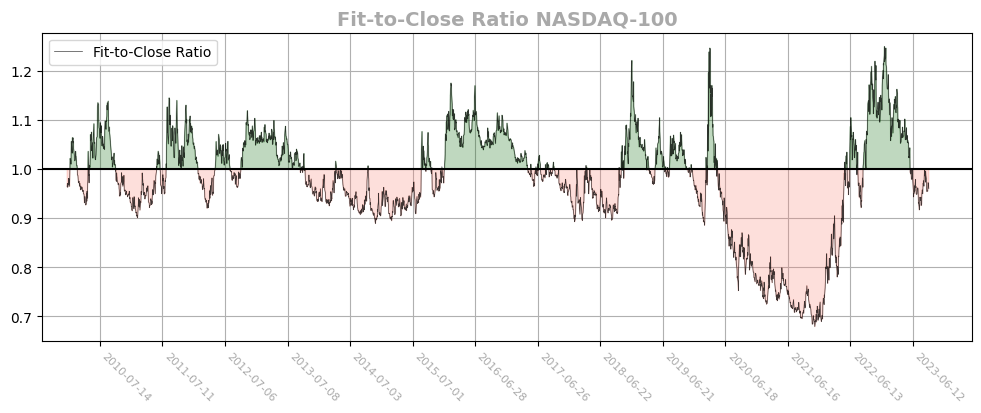

In [16]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("NASDAQ-100 Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio NASDAQ-100", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of the Log Returns:

Log Return Mean & STD :
 - Mean:  0.0006153 ± 0.0002177
 - STD:   0.0109214


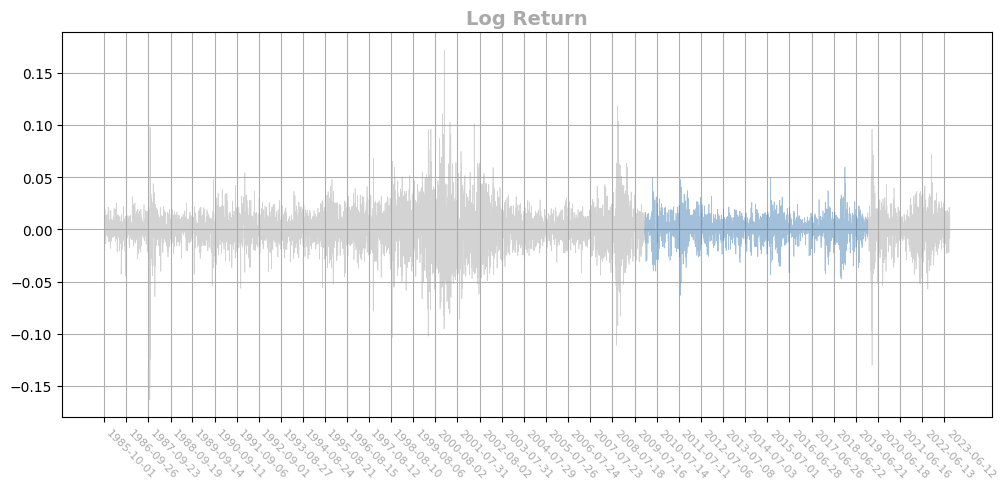

In [17]:
close = ndx_df["Close"].to_numpy()
day = ndx_df["Day"].to_numpy()[:-1]
dates = ndx_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))

fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

## Cummulative Gain During Period:

In [18]:
day = ndx_df["Day"].to_numpy()
low = ndx_df["Low"].to_numpy()
high = ndx_df["High"].to_numpy()
close = ndx_df["Close"].to_numpy()
dates = ndx_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = ndx_df['Date'].iloc[-1]

cumm_strt_day_idx = ndx_df.index[ndx_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = ndx_df.index[ndx_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = ndx_df.index[ndx_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {ndx_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {ndx_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {ndx_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2023-09-11


In [19]:
# Compute number of shares if purchased daily with a fix amount:
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.592
	Max Gain at Target:   1.635
	Close Gain at Target: 1.618
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# Dow Jones

In [20]:
dji_df = pd.read_csv("DJI.csv")

# Convert columns from str to float:
for col in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
    dji_df[col] = dji_df[col].apply(lambda x: float(x.replace(",", "")))

display(dji_df.head(10))
display(len(dji_df.index))

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 11, 2023",34650.01,34784.52,34578.59,34663.72,34663.72,291720000.0
1,"Sep 08, 2023",34487.41,34627.85,34473.57,34576.59,34576.59,293990000.0
2,"Sep 07, 2023",34351.18,34560.86,34351.18,34500.73,34500.73,386980000.0
3,"Sep 06, 2023",34611.68,34611.68,34291.56,34443.19,34443.19,308900000.0
4,"Sep 05, 2023",34843.22,34871.26,34635.63,34641.97,34641.97,283540000.0
5,"Sep 01, 2023",34876.24,34979.18,34720.70,34837.71,34837.71,286370000.0
6,"Aug 31, 2023",34909.09,35070.21,34719.77,34721.91,34721.91,341900000.0
7,"Aug 30, 2023",34847.80,35025.57,34811.74,34890.24,34890.24,236070000.0
8,"Aug 29, 2023",34531.12,34864.42,34531.12,34852.67,34852.67,262550000.0
9,"Aug 28, 2023",34441.64,34652.91,34441.64,34559.98,34559.98,224640000.0


7987

In [21]:
# We need ascending order:
dji_df = dji_df.iloc[::-1]

# Remove duplicates:
dji_df = dji_df.drop_duplicates("Date")
display(len(dji_df.index))

# Reset Index:
dji_df.reset_index(drop=True, inplace=True)

7982

In [22]:
# Conver Date to DateTime Object:
dji_df["DATETIME"] = pd.to_datetime(dji_df["Date"], format="%b %d, %Y")
dji_df["Day"] = (dji_df["DATETIME"] - dji_df["DATETIME"].iloc[0]).dt.days

display(dji_df.head(10))
display(len(dji_df.index))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,"Jan 02, 1992",3152.1,3172.63,3139.31,3172.4,3172.4,23550000.0,1992-01-02,0
1,"Jan 03, 1992",3172.4,3210.64,3165.92,3201.5,3201.5,23620000.0,1992-01-03,1
2,"Jan 06, 1992",3201.5,3213.33,3191.86,3200.1,3200.1,27280000.0,1992-01-06,4
3,"Jan 07, 1992",3200.1,3210.20,3184.48,3204.8,3204.8,25510000.0,1992-01-07,5
4,"Jan 08, 1992",3204.8,3229.20,3185.82,3203.9,3203.9,29040000.0,1992-01-08,6
5,"Jan 09, 1992",3203.9,3228.31,3192.75,3209.5,3209.5,29820000.0,1992-01-09,7
6,"Jan 10, 1992",3209.5,3217.13,3185.38,3199.5,3199.5,23440000.0,1992-01-10,8
7,"Jan 13, 1992",3199.5,3201.25,3179.11,3185.6,3185.6,19300000.0,1992-01-13,11
8,"Jan 14, 1992",3185.6,3248.88,3182.92,3246.2,3246.2,24220000.0,1992-01-14,12
9,"Jan 15, 1992",3246.2,3263.42,3232.11,3258.5,3258.5,29560000.0,1992-01-15,13


7982

In [23]:
# Adjust the "Date" format:
dji_df["Date"] = dji_df["DATETIME"].dt.strftime("%Y-%m-%d")

display(dji_df.head(10))
display(len(dji_df.index))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,1992-01-02,3152.1,3172.63,3139.31,3172.4,3172.4,23550000.0,1992-01-02,0
1,1992-01-03,3172.4,3210.64,3165.92,3201.5,3201.5,23620000.0,1992-01-03,1
2,1992-01-06,3201.5,3213.33,3191.86,3200.1,3200.1,27280000.0,1992-01-06,4
3,1992-01-07,3200.1,3210.20,3184.48,3204.8,3204.8,25510000.0,1992-01-07,5
4,1992-01-08,3204.8,3229.20,3185.82,3203.9,3203.9,29040000.0,1992-01-08,6
5,1992-01-09,3203.9,3228.31,3192.75,3209.5,3209.5,29820000.0,1992-01-09,7
6,1992-01-10,3209.5,3217.13,3185.38,3199.5,3199.5,23440000.0,1992-01-10,8
7,1992-01-13,3199.5,3201.25,3179.11,3185.6,3185.6,19300000.0,1992-01-13,11
8,1992-01-14,3185.6,3248.88,3182.92,3246.2,3246.2,24220000.0,1992-01-14,12
9,1992-01-15,3246.2,3263.42,3232.11,3258.5,3258.5,29560000.0,1992-01-15,13


7982

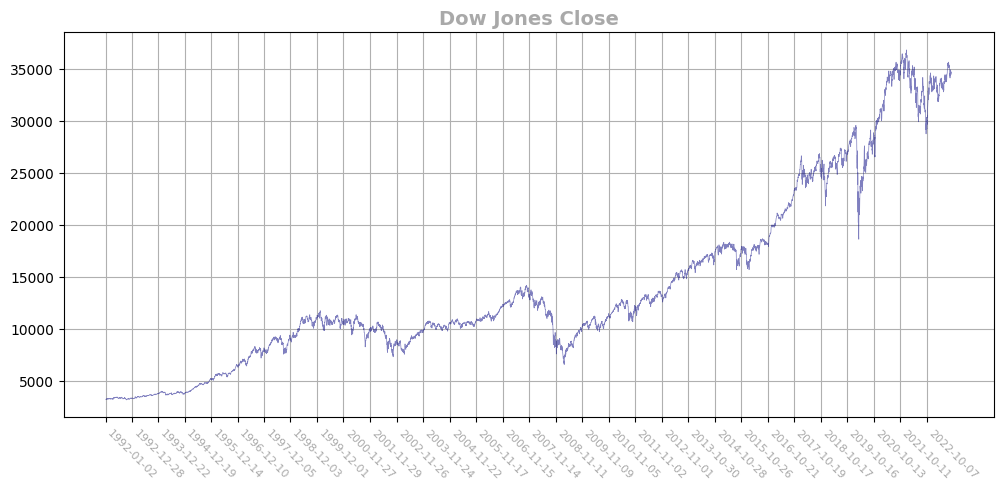

In [24]:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()

day = dji_df["Day"].to_numpy()
close = dji_df["Close"].to_numpy()
dates = dji_df["Date"].to_numpy()

ax.set_title("Dow Jones Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [25]:
day = dji_df["Day"].to_numpy()
close = dji_df["Close"].to_numpy()
log_close = np.log(close)
dates = dji_df["Date"].to_numpy()

strt_date = "2010-01-01"
end_date = "2020-01-01"
target_date = dji_df['Date'].iloc[-1]

strt_day_idx = dji_df.index[dji_df["DATETIME"] >= strt_date][0]
end_day_idx = dji_df.index[dji_df["DATETIME"] > end_date][0]
target_day_idx = dji_df.index[dji_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {dji_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {dji_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {dji_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2010-01-04
	End Date:    2020-01-02
	Target Date: 2023-09-11


In [26]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]


print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope:   ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx]-fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0002729
	Intercept:    7.4409438
	Est. Annual:  0.1047305
Ratio of Expected to Current:  1.156849
Max Deviation:                 1.1617182

Projected Price:               40100.691


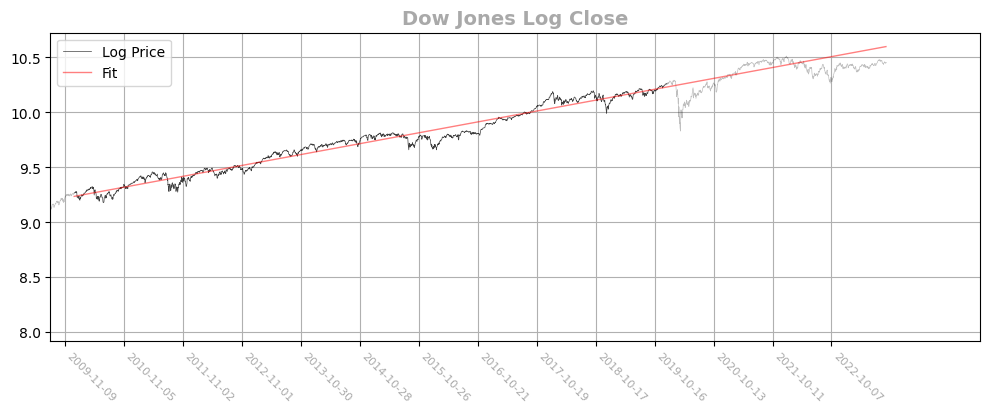

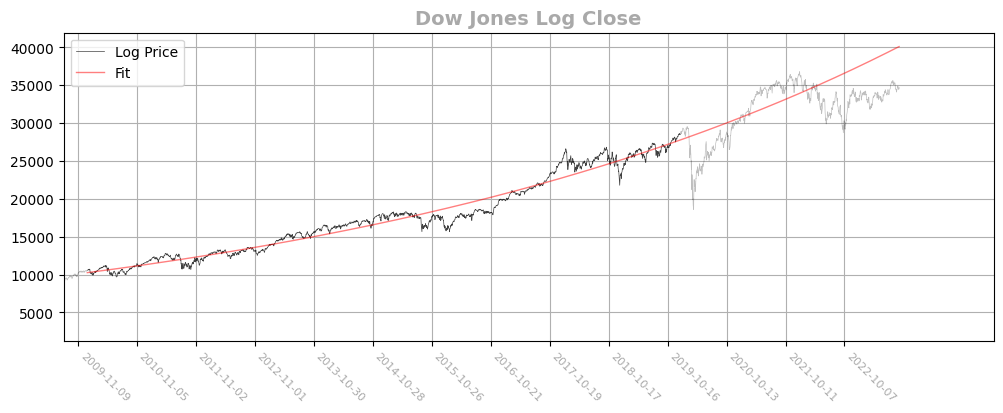

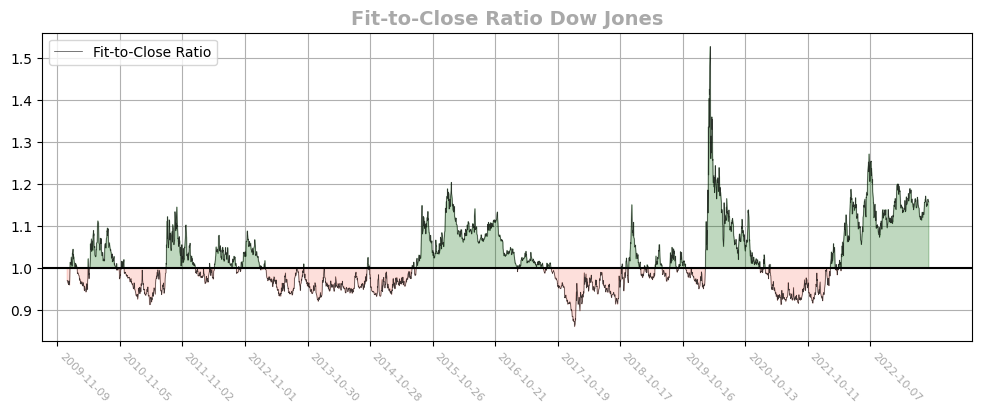

In [27]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Dow Jones Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Dow Jones Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio Dow Jones", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of Log Returns:

Log Return Mean & STD :
 - Mean:  0.0003988 ± 0.0001768
 - STD:   0.0088685


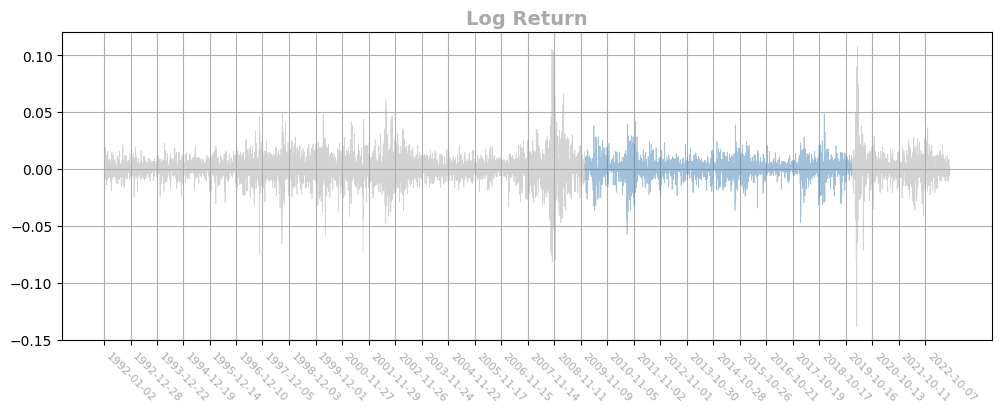

In [28]:
close = dji_df["Close"].to_numpy()
day = dji_df["Day"].to_numpy()[:-1]
dates = dji_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))


fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

In [29]:
strt_day_idx = 0
end_day_idx = -1

print("Dates:")
print(f"\tStart Date: {dji_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:   {dji_df['Date'].iloc[end_day_idx]}\n")

print("Log Return Mean & STD (ALL TIME):")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(f"\tMean: {np.around(log_returns_in_range.mean(), 7)}±{np.around(est_err, 7)}")
print(f"\tSTD:  {np.around(log_returns_in_range.std(), 7)}")

Dates:
	Start Date: 1992-01-02
	End Date:   2023-09-11

Log Return Mean & STD (ALL TIME):
	Mean: 0.0002993±0.0001246
	STD:  0.0111277


## Cummulative Gain During Period:

In [30]:
day = dji_df["Day"].to_numpy()
low = dji_df["Low"].to_numpy()
high = dji_df["High"].to_numpy()
close = dji_df["Close"].to_numpy()
dates = dji_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = dji_df['Date'].iloc[-1]

cumm_strt_day_idx = dji_df.index[dji_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = dji_df.index[dji_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = dji_df.index[dji_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {dji_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {dji_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {dji_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2023-09-11


In [31]:
# Compute number of shares if purchased daily with a fix amount:
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.205
	Max Gain at Target:   1.229
	Close Gain at Target: 1.216
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# S&P 500

In [32]:
sp500_df = pd.read_csv("WSJ_SP500.csv")

display(sp500_df.head(10))

,Date,Open,High,Low,Close
0,09/12/23,4473.39,4487.11,4456.83,4461.90
1,09/11/23,4480.98,4490.77,4467.89,4487.46
2,09/08/23,4451.30,4473.53,4448.38,4457.49
3,09/07/23,4434.55,4457.81,4430.46,4451.14
4,09/06/23,4490.35,4490.35,4442.38,4465.48
5,09/05/23,4510.06,4514.29,4496.01,4496.83
6,09/01/23,4530.85,4541.25,4501.35,4515.77
7,08/31/23,4517.01,4532.26,4507.39,4507.66
8,08/30/23,4500.34,4521.65,4493.59,4514.87
9,08/29/23,4432.75,4500.14,4431.68,4497.63


In [33]:
# We need ascending order:
sp500_df = sp500_df.iloc[::-1]

# Remove duplicates:
sp500_df = sp500_df.drop_duplicates("Date")
display(len(sp500_df.index))

# Reset Index:
sp500_df.reset_index(drop=True, inplace=True)

8489

In [34]:
# Conver Date to DateTime Object:
sp500_df["DATETIME"] = pd.to_datetime(sp500_df["Date"], format="%m/%d/%y")
sp500_df["Day"] = (sp500_df["DATETIME"] - sp500_df["DATETIME"].iloc[0]).dt.days

sp500_df.rename(columns={c: c.replace(" ","") for c in sp500_df.columns}, inplace = True)

display(sp500_df.head(10))

,Date,Open,High,Low,Close,DATETIME,Day
0,01/02/90,359.69,359.69,351.98,359.69,1990-01-02,0
1,01/03/90,358.76,360.59,357.89,358.76,1990-01-03,1
2,01/04/90,355.67,358.76,352.89,355.67,1990-01-04,2
3,01/05/90,352.20,355.67,351.35,352.20,1990-01-05,3
4,01/08/90,353.79,354.24,350.54,353.79,1990-01-08,6
5,01/09/90,349.62,354.17,349.61,349.62,1990-01-09,7
6,01/10/90,347.31,349.62,344.32,347.31,1990-01-10,8
7,01/11/90,348.53,350.14,347.31,348.53,1990-01-11,9
8,01/12/90,339.93,348.53,339.49,339.93,1990-01-12,10
9,01/15/90,337.00,339.94,336.57,337.00,1990-01-15,13


In [35]:
# Adjust the "Date" format:
sp500_df["Date"] = sp500_df["DATETIME"].dt.strftime("%Y-%m-%d")

display(sp500_df.head(10))

,Date,Open,High,Low,Close,DATETIME,Day
0,1990-01-02,359.69,359.69,351.98,359.69,1990-01-02,0
1,1990-01-03,358.76,360.59,357.89,358.76,1990-01-03,1
2,1990-01-04,355.67,358.76,352.89,355.67,1990-01-04,2
3,1990-01-05,352.20,355.67,351.35,352.20,1990-01-05,3
4,1990-01-08,353.79,354.24,350.54,353.79,1990-01-08,6
5,1990-01-09,349.62,354.17,349.61,349.62,1990-01-09,7
6,1990-01-10,347.31,349.62,344.32,347.31,1990-01-10,8
7,1990-01-11,348.53,350.14,347.31,348.53,1990-01-11,9
8,1990-01-12,339.93,348.53,339.49,339.93,1990-01-12,10
9,1990-01-15,337.00,339.94,336.57,337.00,1990-01-15,13


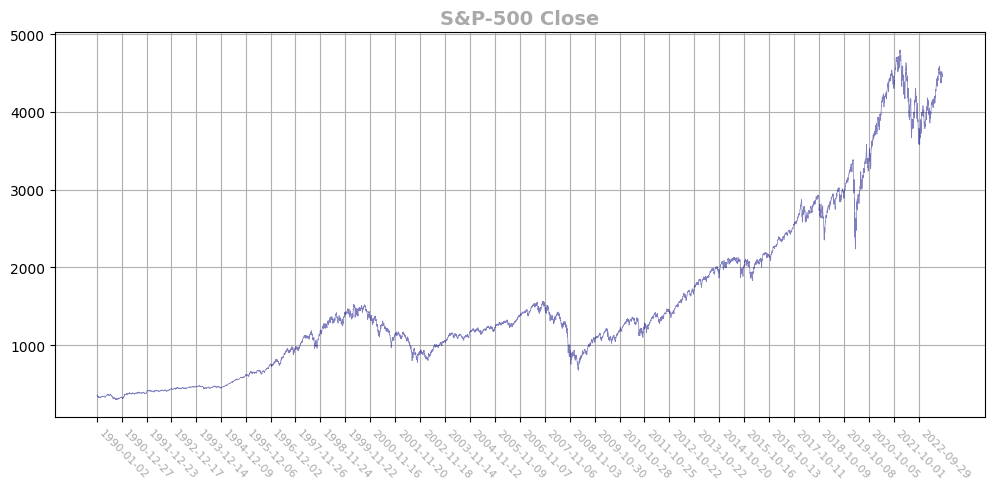

In [36]:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()

day = sp500_df["Day"].to_numpy()
close = sp500_df["Close"].to_numpy()
dates = sp500_df["Date"].to_numpy()

ax.set_title("S&P-500 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [37]:
day = sp500_df["Day"].to_numpy()
close = sp500_df["Close"].to_numpy()
log_close = np.log(close)
dates = sp500_df["Date"].to_numpy()

strt_date = "2010-01-01"
end_date = "2020-01-01"
target_date = sp500_df['Date'].iloc[-1]

strt_day_idx = sp500_df.index[sp500_df["DATETIME"] >= strt_date][0]
end_day_idx = sp500_df.index[sp500_df["DATETIME"] > end_date][0]
target_day_idx = sp500_df.index[sp500_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {sp500_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {sp500_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {sp500_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2010-01-04
	End Date:    2020-01-02
	Target Date: 2023-09-12


In [38]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]


print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0002901
	Intercept:    4.8862623
	Est. Annual:  0.1116838
Ratio of Expected to Current:  1.0541874
Max Deviation:                 1.2203945

Projected Price:               4703.679


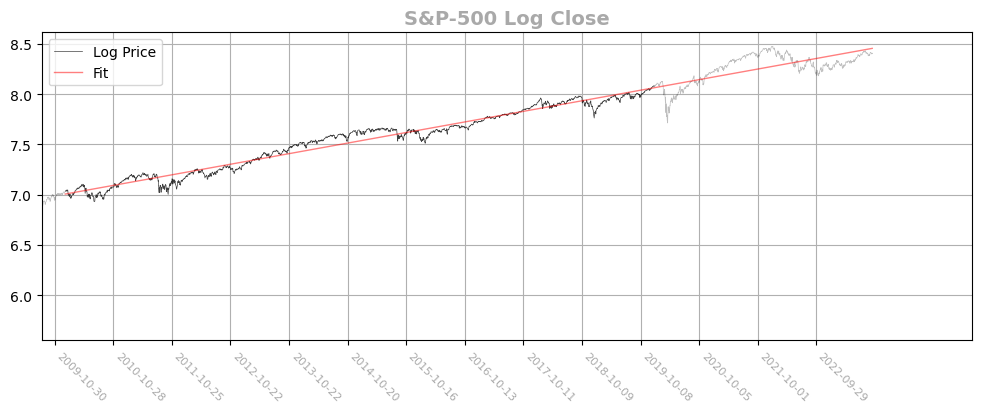

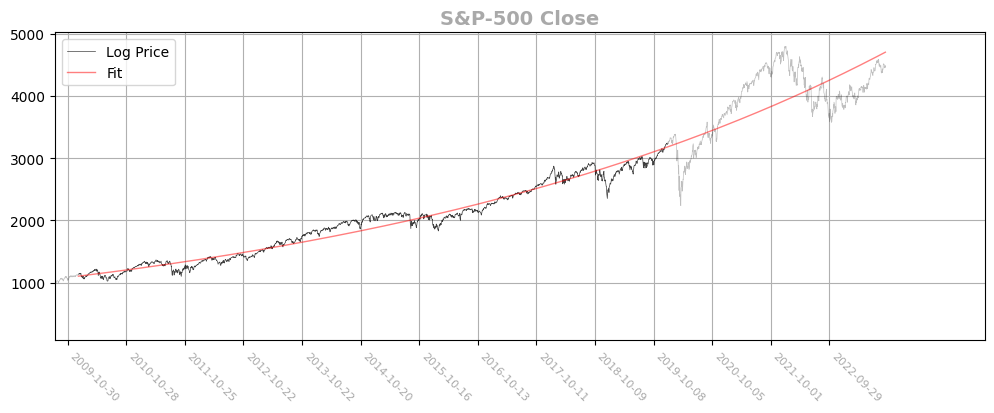

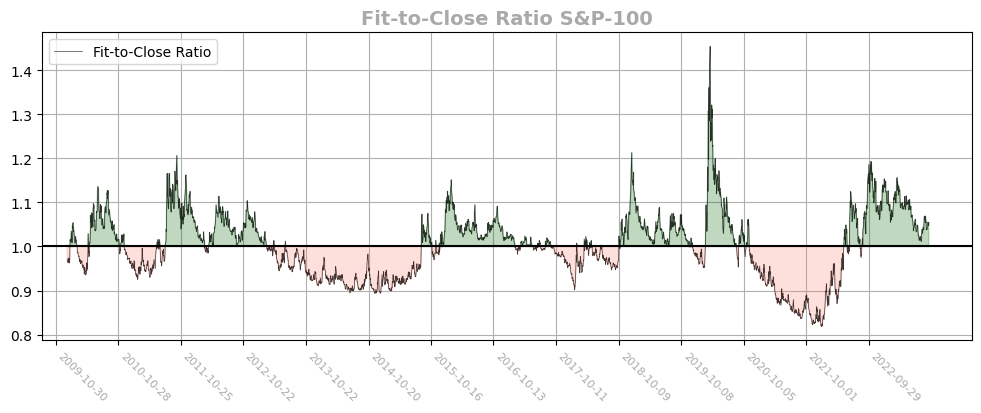

In [39]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("S&P-500 Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("S&P-500 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio S&P-100", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of Log Returns:

Log Return Mean & STD :
 - Mean:  0.0004198 ± 0.0001857
 - STD:   0.0093146


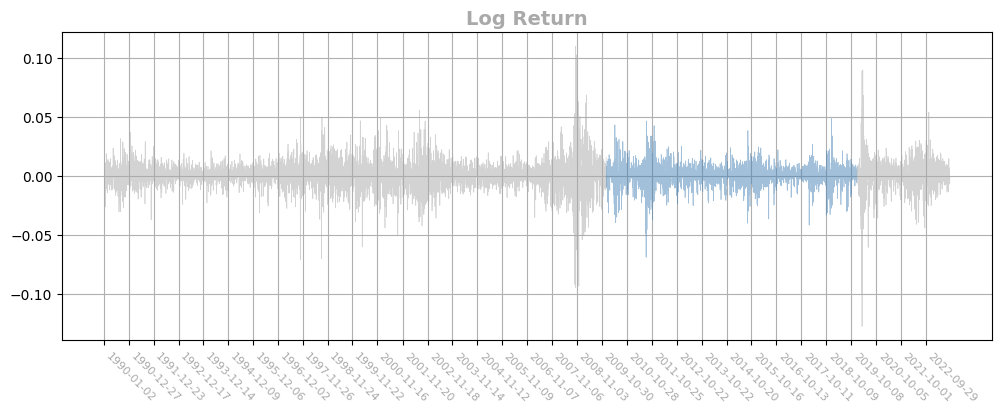

In [40]:
close = sp500_df["Close"].to_numpy()
day = sp500_df["Day"].to_numpy()[:-1]
dates = sp500_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))


fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

In [41]:
strt_day_idx = 0
end_day_idx = -1

print("Dates:")
print(f"\tStart Date: {sp500_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:   {sp500_df['Date'].iloc[end_day_idx]}\n")

print("Log Return Mean & STD (ALL TIME):")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(f"\tMean: {np.around(log_returns_in_range.mean(), 7)}±{np.around(est_err, 7)}")
print(f"\tSTD:  {np.around(log_returns_in_range.std(), 7)}")

Dates:
	Start Date: 1990-01-02
	End Date:   2023-09-12

Log Return Mean & STD (ALL TIME):
	Mean: 0.0002974±0.0001247
	STD:  0.011487


## Cummulative Gain During Period:

In [42]:
day = sp500_df["Day"].to_numpy()
low = sp500_df["Low"].to_numpy()
high = sp500_df["High"].to_numpy()
close = sp500_df["Close"].to_numpy()
dates = sp500_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = sp500_df['Date'].iloc[-1]

cumm_strt_day_idx = sp500_df.index[sp500_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = sp500_df.index[sp500_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = sp500_df.index[sp500_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {sp500_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {sp500_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {sp500_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2023-09-12


In [43]:
# Compute number of shares if purchased daily with a fix amount:
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.332
	Max Gain at Target:   1.358
	Close Gain at Target: 1.341
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# Correlation Coefficient

In [44]:
strt_date = "2013-01-01"
end_date = "2020-01-01"

In [45]:
# GOOG
goog_strt_idx = goog_df.index[goog_df["DATETIME"] >= strt_date][0]
goog_end_idx = goog_df.index[goog_df["DATETIME"] > end_date][0]
goog_close = goog_df["Close"].to_numpy()[goog_strt_idx:goog_end_idx]
goog_dates = goog_df["Date"].to_numpy()[goog_strt_idx:goog_end_idx]
goog_log_return = np.log(goog_close[1:] / goog_close[:-1])
print("GOOG:  ", goog_dates.shape, goog_dates[0], goog_dates[-1])

# NDX
ndx_strt_idx = ndx_df.index[ndx_df["DATETIME"] >= strt_date][0]
ndx_end_idx = ndx_df.index[ndx_df["DATETIME"] > end_date][0]
ndx_close = ndx_df["Close"].to_numpy()[ndx_strt_idx:ndx_end_idx]
ndx_dates = ndx_df["Date"].to_numpy()[ndx_strt_idx:ndx_end_idx]
ndx_log_return = np.log(ndx_close[1:] / ndx_close[:-1])
print("NDX:   ", ndx_dates.shape, ndx_dates[0], ndx_dates[-1])

# DJI
dji_strt_idx = dji_df.index[dji_df["DATETIME"] >= strt_date][0]
dji_end_idx = dji_df.index[dji_df["DATETIME"] > end_date][0]
dji_close = dji_df["Close"].to_numpy()[dji_strt_idx:dji_end_idx]
dji_dates = dji_df["Date"].to_numpy()[dji_strt_idx:dji_end_idx]
dji_log_return = np.log(dji_close[1:] / dji_close[:-1])
print("DJI:   ", dji_dates.shape, dji_dates[0], dji_dates[-1])

# SP500
sp500_strt_idx = sp500_df.index[sp500_df["DATETIME"] >= strt_date][0]
sp500_end_idx = sp500_df.index[sp500_df["DATETIME"] > end_date][0]
sp500_close = sp500_df["Close"].to_numpy()[sp500_strt_idx:sp500_end_idx]
sp500_dates = sp500_df["Date"].to_numpy()[sp500_strt_idx:sp500_end_idx]
sp500_log_return = np.log(sp500_close[1:] / sp500_close[:-1])
print("SP500: ", sp500_dates.shape, sp500_dates[0], sp500_dates[-1])

GOOG:   (1762,) 2013-01-02 2019-12-31
NDX:    (1762,) 2013-01-02 2019-12-31
DJI:    (1762,) 2013-01-02 2019-12-31
SP500:  (1762,) 2013-01-02 2019-12-31


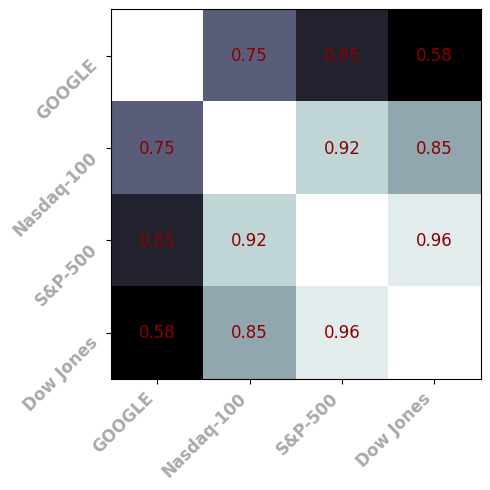

In [46]:
labels = ["GOOGLE", "Nasdaq-100", "S&P-500", "Dow Jones"]
a = np.stack(
    [goog_log_return, ndx_log_return, sp500_log_return, dji_log_return], 
    axis=0)
# print(a.shape, a.dtype)

corr_coef = np.corrcoef(a)
# print(corr_coef)

plt.imshow(corr_coef, cmap="bone")
plt.xticks(np.arange(len(labels)), labels, 
           color="darkgray", fontsize=12, fontweight="bold",
           rotation=45, ha="right", va="top")
plt.yticks(np.arange(len(labels)), labels, 
           color="darkgray", fontsize=12, fontweight="bold",
           rotation=45, ha="right", va="top")
for x in range(len(labels)):
    for y in range(len(labels)):
        if x == y:
            continue
        plt.text(x, y, f"{str(float(corr_coef[x,y])):.4}", 
                 color="darkred", fontsize=12, fontweight="normal", 
                 ha="center", va="center")
plt.show()